# Build an MNIST digit recognition system
## the "hello world"  of deep learning

In this notebook you will build a deep learning network that performs digit recognition on handwritten digits.
We will use the famous MNIST dataset, which will be automatically downloaded for you.
If you want to check out any info on MNIST visit, this page here

http://yann.lecun.com/exdb/mnist/

In this notebook, I will import things as we use them, this is not "best" practice for programming, but I like it for teaching reasons.

In [2]:
# get the MNIST data functions
# matplotlib for plotting
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

### Load the MNIST dataset.

Keras has a built in function which will automatically load the MNIST dataset.  When you run it, it will check if you have the MNIST dataset downloaded and will proceed to download it if you don't have it.

The `load_data()` function automatically sends back 4 different objects.  Don't worry too much about why it's 4 right now, just understand we're creating 4 objects.

`train_images`
`train_labels`
`test_images`
`test_labels`

In [3]:
## mnist.load_data() will automatically download the dataset if you don't have it
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


### Plot the first 20 datapoints, with their labels

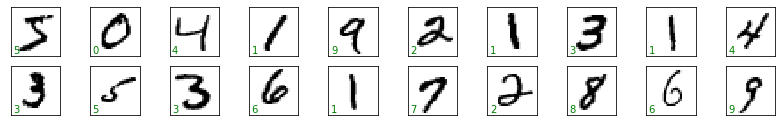

In [12]:
fig, axes = plt.subplots(2, 10, figsize=(14, 2))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(train_labels[i]),
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

In [5]:
train_images[0].shape

(28, 28)

# Build the architecture of the network

In [6]:
from keras import models
from keras import layers

In [7]:
28 * 28

784

In [13]:
network = models.Sequential() #we'll stick to sequential for this course

network.add(layers.Dense(512, activation='relu', input_shape=(784,)))  # Dense is the same as fully connected.
network.add(layers.Dense(10, activation='softmax'))

## The options

**`Sequential`** means what it sounds like, things go in order. We can do other more complicated things, but for this course everything will be sequential

**`Dense`** is the same as fully connected. It's basically direct matrix multiplication, everything gets multiplied by everything else.

**`relu`** is a kind of activation function, more on those later

**`softmax`** is another activation function.

The first integer we pass `512` refers to how **wide** we want our first layer to be.  We are asking for 512 units wide.  The second layer (also happens to be our output layer) is 10 units wide.  This makes sense, because we want the output to have 10 options (one for each possible digit).

The first layer requires us to specify the input shape, we're going with `(784,)` which is the shape of a flattened image in the MNIST dataset.


### We compile the network with an optimizer, loss function and metric

In [14]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

## The options, again.

Before we can run the network, we need compile it, which means we setup some **more** options.  
We select our optimizer, it's going to be `rmsprop`, we select our loss function `categorical_crossentropy`, and we decide on a metric to evaluate our model, which will be `accuracy`.

All these arguments are passed as strings, you can also pass custom things if you want.  But generally, whatever keras offers is good enough for most projects.  You can see all the options at the docs here:


https://keras.io/losses/

https://keras.io/metrics/

https://keras.io/optimizers/


### A bit of preprocessing on the data before we can train (teach) our network

For today, just ignore this.  Consider it a "Necessary evil". It's really not evil, but it is necessary.

In [15]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Fitting the network is also called "training", which is when the network _learns_ from the data!

So, here is the big step! We have set it all up, now we can run. 

### More options though:

* `epochs`, we have to decide how many times to run the training data through
* `batch_size`, we have to decide what size we want to chunk our data into

Note that when we `fit` the model, we have to pass two sets of data, the `train_images` (the actual pictures) and the `train_labels` (the real answers).  In class, I showed passing the `training data` in, but the `labels` just are only shown in the loss function. 

In the API, we need to pass them both at the start, since the `fit` function is doing all the steps, it needs access to everything.

In [16]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2519 - accuracy: 0.9272
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1044 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0681 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0497 - accuracy: 0.9844
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0371 - accuracy: 0.9892


### How do evaluate our network?

So, we got 98.87 accuracy (your result may vary).  That's being reported by keras.  This accuracy is reported on each pass through of the batches and aggregated (we see a mean accuracy per epoch).  

### Question -- if you were making this product for your work - what other tests would you like to do?


#### Your Answer here: 




## Test the accuracy on Test Data

This is the most important step of the entire ML process.
You need to make sure that you are evaluating your model (network) on data it has never seen before.

In [17]:
train_images.shape

(60000, 784)

In [18]:
test_images.shape

(10000, 784)

In [19]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0720 - accuracy: 0.9773


In [20]:
print('test_acc:', test_acc)

test_acc: 0.9772999882698059


## Experiment

Now take 10 minutes and try experimenting with some parameters.  Any option that we set can be changed and you can try something else.

Here are a few things that are very easy to test

* the width of the first layer
* the batch size
* the # of epochs.

How does it affect the results?  A lot of deep learning (and machine learning in general) comes from experimentation. You should not be afraid to try different things.

Make sure you reinitialize the network with `network = model.Sequential()` everytime, otherwise you won't get fair comparisons.  

If you just run `network.fit()` with different parameters but do not re-initialize `network = model.sequential()`  the network won't restart the weights randomly, it will literally continue optimizing from where it left off -- this can be useful, but for experimentation we want to start from scratch everytime.

I've copied pasted all the code you need to experiment with in the code block below:

In [21]:
## Experiment with the parameters below, see how changing epochs, 
## batch size or the width of the first layer affect the results.

network = models.Sequential() #we'll stick to sequential for this course

network.add(layers.Dense(256, activation='relu', input_shape=(784,)))  # Dense is the same as fully connected.
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2905 - accuracy: 0.9179
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1282 - accuracy: 0.9625
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0882 - accuracy: 0.9743
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0660 - accuracy: 0.9801
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0522 - accuracy: 0.9845


In [22]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9777
test_acc: 0.9776999950408936
